In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
from datetime import datetime

In [6]:
print('START TIME : ', str(datetime.now())[10:19])

conn = pymysql.connect(host='localhost', port=3306, user='root', 
                       password='1111', db='wecs')

START TIME :   10:36:40


In [3]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## 15~19년도 24개 암종 성별 암발생자수
* https://kosis.kr/statHtml/statHtml.do?orgId=117&tblId=DT_117N_A00021&vw_cd=MT_ZTITLE&list_id=F_35&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

In [59]:
df1 = pd.read_csv('./data/24개 암종 성별 암발생자수.csv', encoding = 'cp949')
df1

,24개 암종별,성별,2015,2015.1,2015.2,2015.3,2016,2016.1,2016.2,2016.3,...,2017.2,2017.3,2018,2018.1,2018.2,2018.3,2019,2019.1,2019.2,2019.3
0,24개 암종별,성별,발생자수 (명),상대빈도 (%),조발생률 (명/10만명),연령표준화발생률 (명/10만명),발생자수 (명),상대빈도 (%),조발생률 (명/10만명),연령표준화발생률 (명/10만명),...,조발생률 (명/10만명),연령표준화발생률 (명/10만명),발생자수 (명),상대빈도 (%),조발생률 (명/10만명),연령표준화발생률 (명/10만명),발생자수 (명),상대빈도 (%),조발생률 (명/10만명),연령표준화발생률 (명/10만명)
1,모든 암(C00-C96),계,218204,100.0,428.3,280.4,232621,100.0,455.1,291.2,...,461.0,287.7,245874,100.0,479.3,292.4,254718,100.0,496.2,295.8
2,모든 암(C00-C96),남자,115103,100.0,452.1,306.0,121866,100.0,477.4,312.3,...,486.2,306.7,129824,100.0,507.1,308.7,134180,100.0,523.9,308.1
3,모든 암(C00-C96),여자,103101,100.0,404.4,270.8,110755,100.0,432.9,285.6,...,436.0,283.6,116050,100.0,451.6,290.8,120538,100.0,468.5,297.4
4,"입술, 구강 및 인두(C00-C14)",계,3367,1.5,6.6,4.4,3607,1.6,7.1,4.6,...,7.3,4.6,3843,1.6,7.5,4.6,3969,1.6,7.7,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,백혈병(C91-C95),남자,1857,1.6,7.3,6.2,1999,1.6,7.8,6.5,...,7.6,6.2,2055,1.6,8.0,6.4,2108,1.6,8.2,6.5
72,백혈병(C91-C95),여자,1429,1.4,5.6,4.4,1438,1.3,5.6,4.5,...,5.7,4.2,1465,1.3,5.7,4.3,1630,1.4,6.3,4.6
73,기타 암(Re. C00-C96),계,16821,7.7,33.0,21.1,18528,8.0,36.2,22.4,...,36.8,22.0,20311,8.3,39.6,23.0,20735,8.1,40.4,22.7
74,기타 암(Re. C00-C96),남자,8522,7.4,33.5,23.8,9295,7.6,36.4,25.0,...,37.0,24.6,10272,7.9,40.1,25.7,10423,7.8,40.7,25.1


In [60]:
# 발생자수 값만 추출
df1 = df1.iloc[1:, [0,1,2,6,10,14,18]]

# 전체 성별 값만 추출
df1 = df1[df1['성별'] == '계']

# 성별 열 제거
df1.drop('성별', axis = 1, inplace = True)

# 인덱스 변경
df1.set_index('24개 암종별', inplace = True)

# 인덱스 코드 제거
df_index_list = []
for i in range(len(df1.index)):
    a = df1.index[i].split('(')[0]
    df_index_list.append(a)
    
df1.index = df_index_list
df1

,2015,2016,2017,2018,2019
모든 암,218204,232621,236190,245874,254718
"입술, 구강 및 인두",3367,3607,3743,3843,3969
식도,2456,2531,2527,2708,2870
위,29449,30766,30082,29408,29493
대장,27248,28533,28596,28186,29030
간,15971,15964,15670,15834,15605
담낭 및 기타 담도,6319,6761,6919,7235,7383
췌장,6411,6757,7136,7674,8099
후두,1162,1188,1238,1153,1222
폐,24724,26250,27464,28891,29960


In [61]:
df1 = df1.apply(pd.to_numeric)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 모든 암 to 기타 암
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2015    25 non-null     int64
 1   2016    25 non-null     int64
 2   2017    25 non-null     int64
 3   2018    25 non-null     int64
 4   2019    25 non-null     int64
dtypes: int64(5)
memory usage: 1.2+ KB


In [63]:
df1.sort_values(by='2019', ascending = False, inplace = True)
# df1.drop('기타 암', axis = 0, inplace = True)
df1

,2015,2016,2017,2018,2019
모든 암,218204,232621,236190,245874,254718
갑상선,25523,26599,26751,28961,30676
폐,24724,26250,27464,28891,29960
위,29449,30766,30082,29408,29493
대장,27248,28533,28596,28186,29030
유방,19406,21989,22641,23723,24933
기타 암,16821,18528,18841,20311,20735
전립선,10389,12002,13029,14983,16803
간,15971,15964,15670,15834,15605
췌장,6411,6757,7136,7674,8099


In [70]:
# 라인 점 그래프 그리기
df_cancer_top5 = df1.iloc[1:6,:].T
df_cancer_top5

,갑상선,폐,위,대장,유방
2015,25523,24724,29449,27248,19406
2016,26599,26250,30766,28533,21989
2017,26751,27464,30082,28596,22641
2018,28961,28891,29408,28186,23723
2019,30676,29960,29493,29030,24933


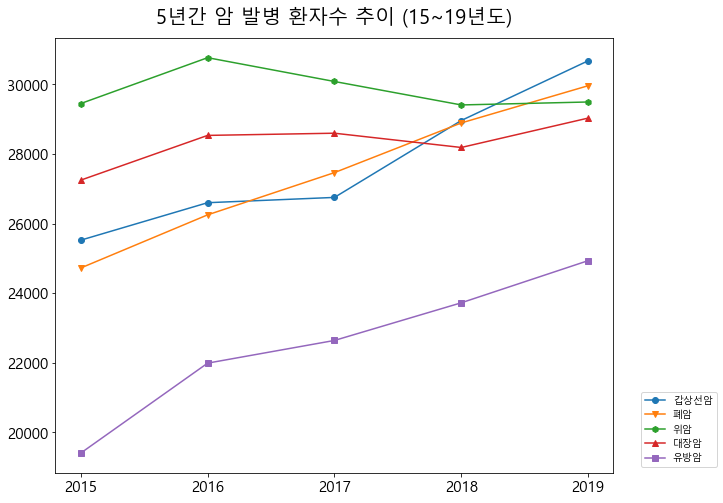

In [90]:
# 그래프
plt.figure(figsize = (10,8))
plt.plot(df_cancer_top5['갑상선'], marker = 'o', label = '갑상선암')
plt.plot(df_cancer_top5['폐'], marker = 'v', label = '폐암')
plt.plot(df_cancer_top5['위'], marker = 'h', label = '위암')
plt.plot(df_cancer_top5['대장'], marker = '^', label = '대장암')
plt.plot(df_cancer_top55['유방'], marker = 's', label = '유방암')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('5년간 암 발병 환자수 추이 (15~19년도)', fontsize = 20, pad = 15)
plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.1))
plt.show()

### 모든 데이터는 2020년도 기준으로 분석

## 지역별 사망원인별 사망자수
* https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B34E09&conn_path=I2

In [216]:
df2 = pd.read_csv('./data/지역별 사망원인별 사망자수.csv',encoding='cp949')
df2

,사망원인별(103항목),성별,시도별,2018,2019,2020
0,계,계,전국,298820,295110,304948
1,계,계,서울특별시,45219,43829,45522
2,계,계,부산광역시,22570,22260,22950
3,계,계,대구광역시,14070,13752,14460
4,계,계,인천광역시,15316,15131,15689
...,...,...,...,...,...,...
1075,질병이환 및 사망의 외인 (V01-Y89),여자,전라북도,401,377,312
1076,질병이환 및 사망의 외인 (V01-Y89),여자,전라남도,456,392,457
1077,질병이환 및 사망의 외인 (V01-Y89),여자,경상북도,583,577,602
1078,질병이환 및 사망의 외인 (V01-Y89),여자,경상남도,700,575,551


In [217]:
df2['사망원인별(103항목)'].unique()

array(['계', '특정 감염성 및 기생충성 질환 (A00-B99, U07.1, U07.2)', '신생물 (C00-D48)',
       '혈액 및 조혈기관질환과 면역메커니즘을 침범하는 특정장애 (D50-D89) (명)',
       '내분비, 영양 및 대사 질환 (E00-E88)', '정신 및 행동장애 (F01-F99)',
       '신경계통의 질환 (G00-G98)', '눈 및 눈부속기의 질환 (H00-H57)',
       '귀 및 유돌의 질환 (H60-H93)', '순환계통 질환 (I00-I99)',
       '호흡계통의 질환 (J00-J98,U04)', '소화계통의 질환 (K00-K92)',
       '피부 및 피하조직의 질환 (L00-L98)', '근골격계통 및 결합 조직의 질환 (M00-M99)',
       '비뇨생식계통의 질환 (N00-N98)', '임신, 출산 및 산후기 (O00-O99)',
       '출생전후기에 기원한 특정병태 (P00-P96)', '선천 기형, 변형 및 염색체 이상 (Q00-Q99)',
       '달리 분류되지 않은 증상, 징후 (R00-R99)', '질병이환 및 사망의 외인 (V01-Y89)'],
      dtype=object)

In [218]:
# 신생물=암에의한 사망에 해당하는 데이터 추출
df_dead = df2[(df2['사망원인별(103항목)'] == '신생물 (C00-D48)')
             & (df2['성별'] == '계')]

# 시도별과 2020년도에 해당하는 값만 추출
df_dead = df_dead[['시도별', '2020']]
df_dead

,시도별,2020
108,전국,83776
109,서울특별시,13791
110,부산광역시,6722
111,대구광역시,3984
112,인천광역시,4475
113,광주광역시,2080
114,대전광역시,2056
115,울산광역시,1524
116,세종특별자치시,344
117,경기도,17528


In [224]:
df_dead.iloc[11,0] = '충북'
df_dead.iloc[12,0] = '충남'
df_dead.iloc[13,0] = '전북'
df_dead.iloc[14,0] = '전남'
df_dead.iloc[15,0] = '경북'
df_dead.iloc[16,0] = '경남'

for i in range(len(df_dead.index)):
    a = df_dead.iloc[i,0][:2]
    df_dead.iloc[i,0] = a
    
df_dead.reset_index(inplace = True)
df_dead.drop('index', axis = 1, inplace = True)
df_dead.columns = ['시군구', '암 사망자수']
df_dead

,시군구,암 사망자수
0,전국,83776
1,서울,13791
2,부산,6722
3,대구,3984
4,인천,4475
5,광주,2080
6,대전,2056
7,울산,1524
8,세종,344
9,경기,17528


## 시도별 전문과목별 전문의 인력현황
* https://kosis.kr/statHtml/statHtml.do?orgId=354&tblId=DT_HIRA4S&conn_path=I2

2020년 4분기 기준

In [263]:
df3 = pd.read_csv('./data/시군구별 전문과목별 전문의 인력현황.csv',
                 encoding = 'cp949', header = 1)
df3

,시군구별(1),계,내과,신경과,정신건강의학과,외과,정형외과,신경외과,흉부외과,성형외과,...,방사선종양학과,병리과,진단검사의학과,결핵과,재활의학과,핵의학과,가정의학과,응급의학과,직업환경의학과,예방의학과
0,전체,88877,16921,1953,3794,6275,6574,2913,1140,2126,...,321,885,907,57,2235,247,6935,1913,560,190
1,서울,24290,4623,518,955,1515,1564,663,306,1080,...,120,318,276,18,577,91,1844,387,82,46
2,부산,6835,1412,148,298,502,527,219,84,164,...,28,70,66,3,165,21,510,89,40,12
3,대구,4953,985,144,196,367,362,176,52,131,...,20,56,50,1,114,21,338,58,19,17
4,인천,4349,850,86,173,318,357,166,55,64,...,14,38,48,2,116,10,318,131,47,5
5,광주,3089,601,63,119,224,233,118,36,49,...,3,25,37,0,74,8,252,84,10,5
6,대전,2981,565,79,130,186,227,91,49,63,...,11,28,22,3,110,7,243,56,24,4
7,울산,1543,296,29,59,117,111,53,22,32,...,3,11,14,0,27,3,107,35,31,7
8,세종,408,66,9,17,20,26,13,7,10,...,2,3,4,0,7,1,36,11,0,0
9,경기,19000,3566,389,798,1233,1540,616,204,239,...,60,182,192,16,523,40,1508,463,103,33


In [264]:
df3.rename(columns = {'시군구별(1)' : '시군구', '계' : '전문의 수'}, inplace = True)
df3

,시군구,전문의 수,내과,신경과,정신건강의학과,외과,정형외과,신경외과,흉부외과,성형외과,...,방사선종양학과,병리과,진단검사의학과,결핵과,재활의학과,핵의학과,가정의학과,응급의학과,직업환경의학과,예방의학과
0,전체,88877,16921,1953,3794,6275,6574,2913,1140,2126,...,321,885,907,57,2235,247,6935,1913,560,190
1,서울,24290,4623,518,955,1515,1564,663,306,1080,...,120,318,276,18,577,91,1844,387,82,46
2,부산,6835,1412,148,298,502,527,219,84,164,...,28,70,66,3,165,21,510,89,40,12
3,대구,4953,985,144,196,367,362,176,52,131,...,20,56,50,1,114,21,338,58,19,17
4,인천,4349,850,86,173,318,357,166,55,64,...,14,38,48,2,116,10,318,131,47,5
5,광주,3089,601,63,119,224,233,118,36,49,...,3,25,37,0,74,8,252,84,10,5
6,대전,2981,565,79,130,186,227,91,49,63,...,11,28,22,3,110,7,243,56,24,4
7,울산,1543,296,29,59,117,111,53,22,32,...,3,11,14,0,27,3,107,35,31,7
8,세종,408,66,9,17,20,26,13,7,10,...,2,3,4,0,7,1,36,11,0,0
9,경기,19000,3566,389,798,1233,1540,616,204,239,...,60,182,192,16,523,40,1508,463,103,33


In [266]:
df_doc = df3[['시군구', '전문의 수']]
df_doc

,시군구,전문의 수
0,전체,88877
1,서울,24290
2,부산,6835
3,대구,4953
4,인천,4349
5,광주,3089
6,대전,2981
7,울산,1543
8,세종,408
9,경기,19000


### 시도별 공공의료기관 전문의 현황
* https://kosis.kr/statHtml/statHtml.do?orgId=411&tblId=DT_411002_06

In [199]:
df3 = pd.read_csv('./data/시도별 공공의료기관 전문의현황.csv',
                  encoding = 'cp949',header = None)
df3

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,A 시도별(1),Y2016 2016,Y2016 2016,Y2016 2016,Y2016 2016,Y2016 2016,Y2016 2016,Y2016 2016,Y2016 2016,Y2016 2016,...,Y2020 2020,Y2020 2020,Y2020 2020,Y2020 2020,Y2020 2020,Y2020 2020,Y2020 2020,Y2020 2020,Y2020 2020,Y2020 2020
1,A 시도별(1),0001 내과,0002 신경과,0003 정신건강의학과,0004 외과,0005 정형외과,0006 신경외과,0007 흉부외과,0008 성형외과,0009 마취통증의학과,...,0019 진단검사의학과,0020 결핵과,0021 재활의학과,0022 핵의학과,0023 가정의학과,0024 응급의학과,0025 직업환경의학과,0026 예방의학과,0027 치과,0028 한방과
2,0001 전국,1570,300,386,546,461,285,185,90,398,...,155,8,273,68,296,381,64,46,427,36
3,0002 서울,370,76,106,122,94,55,39,19,87,...,36,4,51,20,66,78,4,13,132,4
4,0003 부산,117,16,19,42,28,27,20,6,23,...,9,0,12,5,23,13,0,1,17,2
5,0004 대구,104,19,13,43,26,17,13,10,20,...,9,0,13,7,19,14,2,5,35,1
6,0005 인천,17,6,5,7,6,3,2,1,5,...,3,0,11,0,6,4,7,0,3,0
7,0006 광주,92,14,16,20,19,11,10,7,18,...,7,0,12,5,7,12,1,3,36,0
8,0007 대전,89,17,17,23,24,13,8,6,18,...,8,0,16,3,10,16,5,1,5,0
9,0008 울산,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
# 년도, 과에 해당하는 값 수정
for i in range(1,len(df3.columns)):
    df3.iloc[0,i] = df3.iloc[0,i][-4:]
    df3.iloc[1,i] = df3.iloc[1,i][5:]
# 시도별 숫자 제거
for i in range(2, len(df3.index)):
    df3.iloc[i,0] = df3.iloc[i,0][5:]

df3.rename(columns = {0 : '시군구'}, inplace = True)
df3.set_index('시군구', inplace = True)
df3

,1,2,3,4,5,6,7,8,9,10,...,131,132,133,134,135,136,137,138,139,140
시군구,,,,,,,,,,,,,,,,,,,,,
A 시도별(1),2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,...,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020
A 시도별(1),내과,신경과,정신건강의학과,외과,정형외과,신경외과,흉부외과,성형외과,마취통증의학과,산부인과,...,진단검사의학과,결핵과,재활의학과,핵의학과,가정의학과,응급의학과,직업환경의학과,예방의학과,치과,한방과
전국,1570,300,386,546,461,285,185,90,398,256,...,155,8,273,68,296,381,64,46,427,36
서울,370,76,106,122,94,55,39,19,87,57,...,36,4,51,20,66,78,4,13,132,4
부산,117,16,19,42,28,27,20,6,23,17,...,9,0,12,5,23,13,0,1,17,2
대구,104,19,13,43,26,17,13,10,20,14,...,9,0,13,7,19,14,2,5,35,1
인천,17,6,5,7,6,3,2,1,5,3,...,3,0,11,0,6,4,7,0,3,0
광주,92,14,16,20,19,11,10,7,18,9,...,7,0,12,5,7,12,1,3,36,0
대전,89,17,17,23,24,13,8,6,18,9,...,8,0,16,3,10,16,5,1,5,0


In [201]:
df_doc = df3.iloc[:,-28:]
df_doc = df_doc.rename(columns = df_doc.iloc[1])
df_doc.drop(df_doc.index[[0,1]], inplace = True)
df_doc

,내과,신경과,정신건강의학과,외과,정형외과,신경외과,흉부외과,성형외과,마취통증의학과,산부인과,...,진단검사의학과,결핵과,재활의학과,핵의학과,가정의학과,응급의학과,직업환경의학과,예방의학과,치과,한방과
시군구,,,,,,,,,,,,,,,,,,,,,
전국,1776,361,388,599,477,311,197,98,431,285,...,155,8,273,68,296,381,64,46,427,36
서울,420,81,106,138,99,64,43,13,99,67,...,36,4,51,20,66,78,4,13,132,4
부산,120,17,18,42,20,25,17,6,24,15,...,9,0,12,5,23,13,0,1,17,2
대구,122,28,22,42,26,20,10,8,21,17,...,9,0,13,7,19,14,2,5,35,1
인천,20,6,6,7,7,7,3,2,5,4,...,3,0,11,0,6,4,7,0,3,0
광주,102,19,17,23,21,12,8,9,15,9,...,7,0,12,5,7,12,1,3,36,0
대전,84,18,17,24,29,13,13,7,24,11,...,8,0,16,3,10,16,5,1,5,0
울산,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
세종,21,6,3,5,3,4,4,2,7,4,...,2,0,3,1,2,10,0,0,1,0


In [202]:
df_doc = df_doc.apply(pd.to_numeric)
df_doc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 전국 to 제주
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   내과       18 non-null     int64
 1   신경과      18 non-null     int64
 2   정신건강의학과  18 non-null     int64
 3   외과       18 non-null     int64
 4   정형외과     18 non-null     int64
 5   신경외과     18 non-null     int64
 6   흉부외과     18 non-null     int64
 7   성형외과     18 non-null     int64
 8   마취통증의학과  18 non-null     int64
 9   산부인과     18 non-null     int64
 10  소아청소년과   18 non-null     int64
 11  안과       18 non-null     int64
 12  이비인후과    18 non-null     int64
 13  피부과      18 non-null     int64
 14  비뇨기과     18 non-null     int64
 15  영상의학과    18 non-null     int64
 16  방사선종양학과  18 non-null     int64
 17  병리과      18 non-null     int64
 18  진단검사의학과  18 non-null     int64
 19  결핵과      18 non-null     int64
 20  재활의학과    18 non-null     int64
 21  핵의학과     18 non-null     int64
 22  가정의학과    18 non-null     int64
 

In [203]:
df_doc['전문의 수'] = 0
for i in range(len(df_doc.index)):
    s = sum(df_doc.iloc[i].values)
    df_doc.iloc[i,-1] = s
    
df_doc

,내과,신경과,정신건강의학과,외과,정형외과,신경외과,흉부외과,성형외과,마취통증의학과,산부인과,...,결핵과,재활의학과,핵의학과,가정의학과,응급의학과,직업환경의학과,예방의학과,치과,한방과,전문의 수
시군구,,,,,,,,,,,,,,,,,,,,,
전국,1776,361,388,599,477,311,197,98,431,285,...,8,273,68,296,381,64,46,427,36,8611
서울,420,81,106,138,99,64,43,13,99,67,...,4,51,20,66,78,4,13,132,4,2021
부산,120,17,18,42,20,25,17,6,24,15,...,0,12,5,23,13,0,1,17,2,508
대구,122,28,22,42,26,20,10,8,21,17,...,0,13,7,19,14,2,5,35,1,559
인천,20,6,6,7,7,7,3,2,5,4,...,0,11,0,6,4,7,0,3,0,119
광주,102,19,17,23,21,12,8,9,15,9,...,0,12,5,7,12,1,3,36,0,389
대전,84,18,17,24,29,13,13,7,24,11,...,0,16,3,10,16,5,1,5,0,404
울산,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
세종,21,6,3,5,3,4,4,2,7,4,...,0,3,1,2,10,0,0,1,0,108


In [204]:
df_doc.reset_index(inplace = True)
df_doc.rename(columns = {'index' : '시군구'}, inplace = True)
df_doc

,시군구,내과,신경과,정신건강의학과,외과,정형외과,신경외과,흉부외과,성형외과,마취통증의학과,...,결핵과,재활의학과,핵의학과,가정의학과,응급의학과,직업환경의학과,예방의학과,치과,한방과,전문의 수
0,전국,1776,361,388,599,477,311,197,98,431,...,8,273,68,296,381,64,46,427,36,8611
1,서울,420,81,106,138,99,64,43,13,99,...,4,51,20,66,78,4,13,132,4,2021
2,부산,120,17,18,42,20,25,17,6,24,...,0,12,5,23,13,0,1,17,2,508
3,대구,122,28,22,42,26,20,10,8,21,...,0,13,7,19,14,2,5,35,1,559
4,인천,20,6,6,7,7,7,3,2,5,...,0,11,0,6,4,7,0,3,0,119
5,광주,102,19,17,23,21,12,8,9,15,...,0,12,5,7,12,1,3,36,0,389
6,대전,84,18,17,24,29,13,13,7,24,...,0,16,3,10,16,5,1,5,0,404
7,울산,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,세종,21,6,3,5,3,4,4,2,7,...,0,3,1,2,10,0,0,1,0,108
9,경기,314,64,74,116,98,58,33,17,84,...,0,54,10,46,89,11,7,53,0,1536


In [206]:
df_doc_all = df_doc[['시군구','전문의 수']]
df_doc_all

,시군구,전문의 수
0,전국,8611
1,서울,2021
2,부산,508
3,대구,559
4,인천,119
5,광주,389
6,대전,404
7,울산,1
8,세종,108
9,경기,1536


## 시도별 내시경 전문의 인원수
* https://www.gie.or.kr/branch/hospital/index.php#
<br></br>
위 사이트를 참고하여 인원수 csv 파일을 생성하였음

In [172]:
df4 = pd.read_csv('./data/시도별 내시경 전문의 인원수.csv', encoding = 'cp949')
df4 = df4.T
df4

,0
Unnamed: 0,내시경 전문의
계,NaN
서울,2302
부산,710
대구,525
인천,433
광주,322
대전,292
울산,166
세종,42


In [9]:
sql = "select * from endoTBL"
df_4 = pd.read_sql_query(sql,conn)
df_4.to_csv(r'df_4_output.csv', index=False)

print('END TIME : ', str(datetime.now())[10:19])
df_4

END TIME :   10:40:40


C:\Users\user\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,region,pro
0,강원,186
1,경기,1954
2,경남,432
3,경북,270
4,광주,322
5,대구,525
6,대전,292
7,부산,710
8,서울,2302
9,세종,42


In [173]:
df_endo = df4.iloc[2:]
df_endo = df_endo.reset_index()
df_endo.columns = ['시군구', '내시경 전문의 수']
df_endo

,시군구,내시경 전문의 수
0,서울,2302
1,부산,710
2,대구,525
3,인천,433
4,광주,322
5,대전,292
6,울산,166
7,세종,42
8,경기,1954
9,강원,186


## 시도별 공공의료기관 기능별 병상 수
* https://kosis.kr/statHtml/statHtml.do?orgId=411&tblId=DT_411002_02

In [174]:
df5 = pd.read_csv('./data/시도별 공공의료기관 기능별병상 수.csv',
                  encoding = 'cp949',header = None)
df5

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,A 시도별(1),Y2016 2016,Y2016 2016,Y2016 2016,Y2016 2016,Y2016 2016,Y2016 2016,Y2016 2016,Y2016 2016,Y2016 2016,...,Y2020 2020,Y2020 2020,Y2020 2020,Y2020 2020,Y2020 2020,Y2020 2020,Y2020 2020,Y2020 2020,Y2020 2020,Y2020 2020
1,A 시도별(1),0001 총계,0001 총계,0002 일반진료중심(광역 이상),0002 일반진료중심(광역 이상),0003 일반진료중심(단일 혹은 복수 기초자치단체),0003 일반진료중심(단일 혹은 복수 기초자치단체),0004 특수대상중심,0004 특수대상중심,0005 특수질환중심,...,0002 일반진료중심(광역 이상),0002 일반진료중심(광역 이상),0003 일반진료중심(단일 혹은 복수 기초자치단체),0003 일반진료중심(단일 혹은 복수 기초자치단체),0004 특수대상중심,0004 특수대상중심,0005 특수질환중심,0005 특수질환중심,0006 노인병원,0006 노인병원
2,A 시도별(1),T001 병상수 (14STD03220 개),T002 비율 (14STD00018 %),T001 병상수 (14STD03220 개),T002 비율 (14STD00018 %),T001 병상수 (14STD03220 개),T002 비율 (14STD00018 %),T001 병상수 (14STD03220 개),T002 비율 (14STD00018 %),T001 병상수 (14STD03220 개),...,T001 병상수 (14STD03220 개),T002 비율 (14STD00018 %),T001 병상수 (14STD03220 개),T002 비율 (14STD00018 %),T001 병상수 (14STD03220 개),T002 비율 (14STD00018 %),T001 병상수 (14STD03220 개),T002 비율 (14STD00018 %),T001 병상수 (14STD03220 개),T002 비율 (14STD00018 %)
3,0001 전국,64735,100.0,16090,100.0,11221,100.0,11561,100.0,11425,...,16565,100.0,12457,100.0,9271,100.0,10310,100.0,14814,100.0
4,0002 서울,8553,13.2,2270,14.1,1939,17.3,1348,11.7,2111,...,2257,13.6,2241,18.0,1397,15.1,1819,17.6,903,6.1
5,0003 부산,4117,6.4,1331,8.3,502,4.5,822,7.1,607,...,1191,7.2,548,4.4,499,5.4,586,5.7,832,5.6
6,0004 대구,3669,5.7,1505,9.4,558,5.0,753,6.5,360,...,1742,10.5,495,4.0,697,7.5,372,3.6,494,3.3
7,0005 인천,1196,1.8,0,0.0,484,4.3,354,3.1,110,...,0,0.0,516,4.1,494,5.3,120,1.2,276,1.9
8,0006 광주,2709,4.2,1202,7.5,0,0.0,613,5.3,483,...,1081,6.5,0,0.0,571,6.2,685,6.6,460,3.1
9,0007 대전,3179,4.9,1366,8.5,0,0.0,1283,11.1,199,...,1329,8.0,0,0.0,1126,12.1,199,1.9,364,2.5


In [175]:
df_room = df5.iloc[:,[0,-12,-11]]
df_room.columns = ['시군구', '병상 수', '병상 비율']
df_room = df_room.iloc[4:, :]
df_room.reset_index(inplace = True)
df_room.drop('index', axis = 1, inplace = True)
df_room

,시군구,병상 수,병상 비율
0,0002 서울,8617,13.6
1,0003 부산,3656,5.8
2,0004 대구,3800,6.0
3,0005 인천,1406,2.2
4,0006 광주,2797,4.4
5,0007 대전,3018,4.8
6,0008 울산,157,0.2
7,0009 세종,259,0.4
8,0010 경기,9107,14.4
9,0011 강원,3565,5.6


In [176]:
for i in range(len(df_room.index)):
    df_room.iloc[i,0] = df_room.iloc[i, 0][-2:]

df_room

,시군구,병상 수,병상 비율
0,서울,8617,13.6
1,부산,3656,5.8
2,대구,3800,6.0
3,인천,1406,2.2
4,광주,2797,4.4
5,대전,3018,4.8
6,울산,157,0.2
7,세종,259,0.4
8,경기,9107,14.4
9,강원,3565,5.6


## 시도별 신규 암유형별 등록인원 현황
* https://kosis.kr/statHtml/statHtml.do?orgId=350&tblId=DT_35001_A089&conn_path=I3

#### 2020년도 자료

In [177]:
df6 = pd.read_csv('./data/시도별 신규 암유형별 등록인원 현황.csv'
                  , encoding = 'cp949', header = 1)
df6 = df6.T
df6

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
암유형별(1),계,폐암,위암,간암,대장암,유방암,자궁경부암,입술구강암,식도암,담낭암,...,신장암,신우암,요관암,방광암,뇌암,비호지킨림프종,다발성골수종,백혈병,갑상샘암,기타암
계,317988,28557,26994,17989,27311,27565,3341,4172,2783,2576,...,6228,839,1093,7914,2555,5838,2276,5387,31995,72866
서울,60519,5059,4381,2976,4899,5809,565,824,511,434,...,1183,172,197,1573,445,1187,445,1051,6091,14856
부산,22661,2053,2019,1514,1986,1753,278,285,255,220,...,443,64,86,610,164,388,143,354,2606,4799
대구,14418,1429,1218,745,1244,1222,178,177,101,120,...,302,38,54,345,115,262,106,230,1643,3125
인천,16994,1460,1355,927,1499,1654,193,234,154,120,...,356,55,49,469,143,310,110,298,1798,3917
광주,8447,699,657,499,612,655,86,114,47,73,...,150,24,31,155,69,130,66,144,951,2271
대전,8540,734,773,400,741,800,87,110,51,62,...,170,15,31,179,85,172,58,130,858,1975
울산,6516,544,569,402,478,587,66,85,53,52,...,134,12,17,94,63,111,42,127,888,1634
세종,1820,146,134,67,124,197,19,15,16,16,...,39,3,6,26,12,26,10,35,268,450


In [178]:
df_reg_can = df6.rename(columns = df6.iloc[0])
df_reg_can = df_reg_can.rename(columns = {'계' : '총 등록 암 환자 수'})
df_reg_can.drop(df_reg_can.index[0], inplace = True)
df_reg_can = df_reg_can[1:18] # 계,기타 열 제거

In [179]:
df_reg_can.reset_index(inplace = True)
df_reg_can.rename(columns = {'index' : '시군구'}, inplace = True)
df_reg_can

,시군구,총 등록 암 환자 수,폐암,위암,간암,대장암,유방암,자궁경부암,입술구강암,식도암,...,신장암,신우암,요관암,방광암,뇌암,비호지킨림프종,다발성골수종,백혈병,갑상샘암,기타암
0,서울,60519,5059,4381,2976,4899,5809,565,824,511,...,1183,172,197,1573,445,1187,445,1051,6091,14856
1,부산,22661,2053,2019,1514,1986,1753,278,285,255,...,443,64,86,610,164,388,143,354,2606,4799
2,대구,14418,1429,1218,745,1244,1222,178,177,101,...,302,38,54,345,115,262,106,230,1643,3125
3,인천,16994,1460,1355,927,1499,1654,193,234,154,...,356,55,49,469,143,310,110,298,1798,3917
4,광주,8447,699,657,499,612,655,86,114,47,...,150,24,31,155,69,130,66,144,951,2271
5,대전,8540,734,773,400,741,800,87,110,51,...,170,15,31,179,85,172,58,130,858,1975
6,울산,6516,544,569,402,478,587,66,85,53,...,134,12,17,94,63,111,42,127,888,1634
7,세종,1820,146,134,67,124,197,19,15,16,...,39,3,6,26,12,26,10,35,268,450
8,경기,76733,6325,6087,3948,6631,7559,852,955,573,...,1608,204,263,1907,640,1430,515,1322,8156,18511
9,강원,10117,1036,880,703,1027,749,91,144,108,...,189,26,35,270,66,183,81,170,664,2145


### 위암 환자만 추출

In [180]:
# 시군구별 위암 환자 수
df_gastric = df_reg_can.iloc[:, [0, 3]]
df_gastric

,시군구,위암
0,서울,4381
1,부산,2019
2,대구,1218
3,인천,1355
4,광주,657
5,대전,773
6,울산,569
7,세종,134
8,경기,6087
9,강원,880


### 총 암 환자수만 추출

In [181]:
# 시군구별 총 암 환자 수
df_can = df_reg_can.iloc[:, [0, 1]]
df_can

,시군구,총 등록 암 환자 수
0,서울,60519
1,부산,22661
2,대구,14418
3,인천,16994
4,광주,8447
5,대전,8540
6,울산,6516
7,세종,1820
8,경기,76733
9,강원,10117


## 지역별 인구 및 인구밀도
* https://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1007

In [299]:
df7 = pd.read_csv('./data/지역별 인구 및 인구밀도.csv'
                  , encoding='cp949', header = 2)
df7

,Unnamed: 0,2017,Unnamed: 2,2018,Unnamed: 4,2019,Unnamed: 6,2020,Unnamed: 8,2021,Unnamed: 10
0,NaN,인구,인구밀도,인구,인구밀도,인구,인구밀도,인구,인구밀도,인구,인구밀도
1,계,51362,512,51585,514,51765,516,51836,516,51745,515
2,수도권,25476,2149,25660,2164,25851,2179,26021,2193,26054,2195
3,경기,12786,1255,13027,1279,13241,1299,13452,1319,13612,1335
4,서울,9766,16136,9697,16023,9657,15956,9618,15891,9502,15699
5,부산,3424,4447,3403,4420,3381,4391,3356,4358,3327,4320
6,경남,3339,317,3351,318,3350,318,3340,317,3318,315
7,인천,2924,2750,2936,2761,2952,2777,2951,2770,2941,2758
8,경북,2675,141,2675,141,2671,140,2652,139,2641,139
9,대구,2458,2782,2449,2772,2437,2758,2414,2733,2388,2702


In [301]:
df_po = df7.iloc[3:20,[0, 7]]
df_po.columns = ['시군구', '인구 수']
df_po.reset_index(inplace = True)
df_po.drop('index', axis = 1, inplace = True)
df_po

,시군구,인구 수
0,경기,13452
1,서울,9618
2,부산,3356
3,경남,3340
4,인천,2951
5,경북,2652
6,대구,2414
7,충남,2177
8,전북,1806
9,전남,1793


## 데이터 merge

In [302]:
df_merge = pd.merge(df_po, df_can, on = '시군구')

In [303]:
df_merge = pd.merge(df_merge, df_dead, on = '시군구')

In [304]:
# df_merge = pd.merge(df_merge, df_doc_all, on = '시군구')
df_merge = pd.merge(df_merge, df_doc, on = '시군구')

In [305]:
df_merge = pd.merge(df_merge, df_endo, on = '시군구')
df_merge

,시군구,인구 수,총 등록 암 환자 수,암 사망자수,전문의 수,내시경 전문의 수
0,경기,13452,76733,17528,19000,1954
1,서울,9618,60519,13791,24290,2302
2,부산,3356,22661,6722,6835,710
3,경남,3340,20589,6084,4753,432
4,인천,2951,16994,4475,4349,433
5,경북,2652,17709,5700,3181,270
6,대구,2414,14418,3984,4953,525
7,충남,2177,13608,4024,2625,195
8,전북,1806,12442,3650,2962,284
9,전남,1793,13209,4466,2564,213


In [306]:
df_merge.set_index('시군구', inplace = True)
df_merge

,인구 수,총 등록 암 환자 수,암 사망자수,전문의 수,내시경 전문의 수
시군구,,,,,
경기,13452,76733,17528,19000,1954
서울,9618,60519,13791,24290,2302
부산,3356,22661,6722,6835,710
경남,3340,20589,6084,4753,432
인천,2951,16994,4475,4349,433
경북,2652,17709,5700,3181,270
대구,2414,14418,3984,4953,525
충남,2177,13608,4024,2625,195
전북,1806,12442,3650,2962,284


In [307]:
df_merge = df_merge.reindex(index = ['서울','경기','인천','부산','대구','광주','대전','울산',
                                     '강원','충북','충남','전북','전남','경북','경남','제주','세종'])
df_merge

,인구 수,총 등록 암 환자 수,암 사망자수,전문의 수,내시경 전문의 수
시군구,,,,,
서울,9618,60519,13791,24290,2302
경기,13452,76733,17528,19000,1954
인천,2951,16994,4475,4349,433
부산,3356,22661,6722,6835,710
대구,2414,14418,3984,4953,525
광주,1480,8447,2080,3089,322
대전,1492,8540,2056,2981,292
울산,1139,6516,1524,1543,166
강원,1519,10117,3156,2183,186


In [308]:
df_merge = df_merge.apply(pd.to_numeric)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 서울 to 세종
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   인구 수         17 non-null     int64
 1   총 등록 암 환자 수  17 non-null     int64
 2   암 사망자수       17 non-null     int64
 3   전문의 수        17 non-null     int64
 4   내시경 전문의 수    17 non-null     int64
dtypes: int64(5)
memory usage: 816.0+ bytes


In [309]:
ls_append1 = (df_merge['인구 수'].values*1000) / df_merge['전문의 수'].values

In [310]:
ls_append2 = (df_merge['인구 수'].values*1000) / df_merge['내시경 전문의 수'].values

In [324]:
ls_append3 = df_merge['암 사망자수'].values / df_merge['인구 수'].values

In [325]:
df_merge['전문의 1명당 진료 환자 수'] = ls_append1

In [326]:
df_merge['내시경 전문의 1명당 진료 환자 수'] = ls_append2

In [327]:
df_merge['인구 대비 암 사망자 수'] = ls_append3

### 인구 수는 천명 단위이므로 주의

In [328]:
df_merge

,인구 수,총 등록 암 환자 수,암 사망자수,전문의 수,내시경 전문의 수,전문의 1명당 진료 환자 수,내시경 전문의 1명당 진료 환자 수,인구 대비 암 사망자 수
시군구,,,,,,,,
서울,9618,60519,13791,24290,2302,395.965418,4178.105995,1.433874
경기,13452,76733,17528,19000,1954,708.000000,6884.339816,1.303003
인천,2951,16994,4475,4349,433,678.546792,6815.242494,1.516435
부산,3356,22661,6722,6835,710,491.002195,4726.760563,2.002980
대구,2414,14418,3984,4953,525,487.381385,4598.095238,1.650373
광주,1480,8447,2080,3089,322,479.119456,4596.273292,1.405405
대전,1492,8540,2056,2981,292,500.503187,5109.589041,1.378016
울산,1139,6516,1524,1543,166,738.172391,6861.445783,1.338016
강원,1519,10117,3156,2183,186,695.831425,8166.666667,2.077683


In [329]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 서울 to 세종
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   인구 수                 17 non-null     int64  
 1   총 등록 암 환자 수          17 non-null     int64  
 2   암 사망자수               17 non-null     int64  
 3   전문의 수                17 non-null     int64  
 4   내시경 전문의 수            17 non-null     int64  
 5   전문의 1명당 진료 환자 수      17 non-null     float64
 6   내시경 전문의 1명당 진료 환자 수  17 non-null     float64
 7   인구 대비 암 사망자 수        17 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 1.2+ KB


In [31]:
# csv 만들기
address = 'C:/Users/user/Downloads/'
df_merge.to_csv(path_or_buf = address + 'result.csv'
                , encoding = 'cp949', index = False)

# 그래프

## 인구 대비 암 사망률

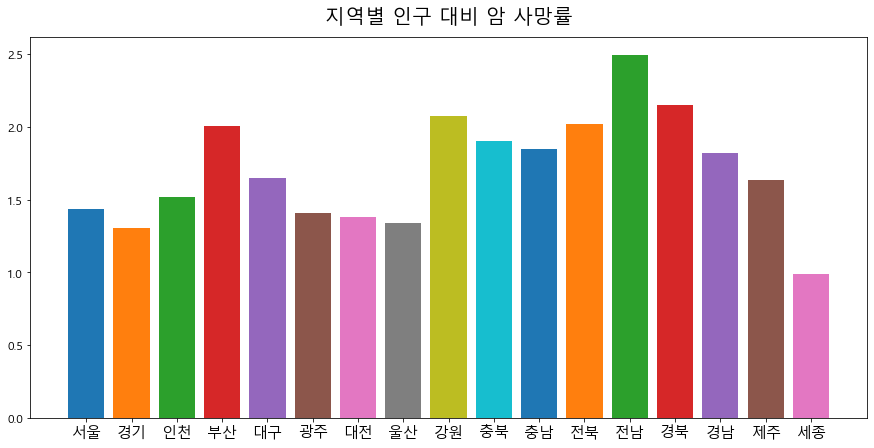

In [349]:
plt.figure(figsize = (15,7))
colors = sns.color_palette('tab10', len(df_merge.index))
plt.bar(df_merge.index, df_merge['인구 대비 암 사망자 수'], color = colors)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('지역별 인구 대비 암 사망률', fontsize = 20, pad = 15)
plt.show()

## 지역별 전문의 수

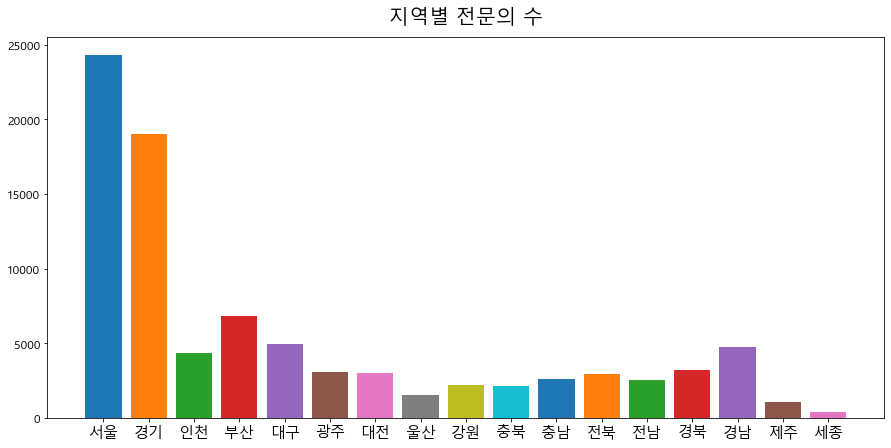

In [352]:
plt.figure(figsize = (15,7))
colors = sns.color_palette('tab10', len(df_merge.index))
plt.bar(df_merge.index, df_merge['전문의 수'], color = colors)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('지역별 전문의 수', fontsize = 20, pad = 15)
plt.show()

## 전문의 1명당 환자 수

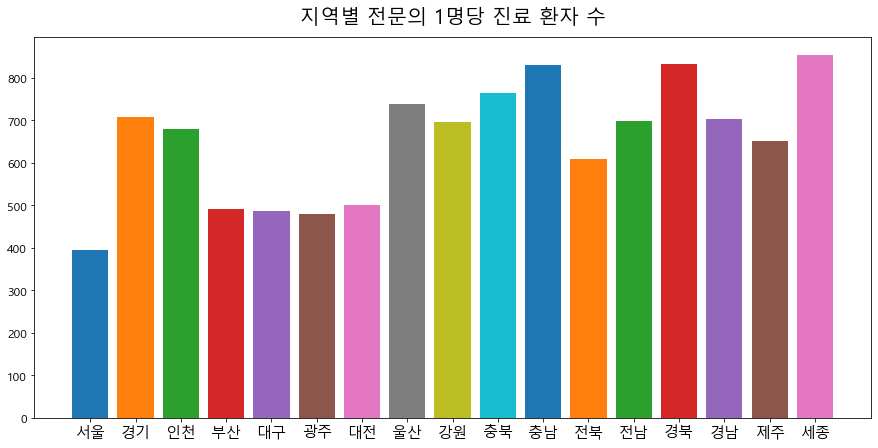

In [350]:
plt.figure(figsize = (15,7))
colors = sns.color_palette('tab10', len(df_merge.index))
plt.bar(df_merge.index, df_merge['전문의 1명당 진료 환자 수'], color = colors)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('지역별 전문의 1명당 진료 환자 수', fontsize = 20, pad = 15)
plt.show()

## 내시경 전문의 1명당 환자 수

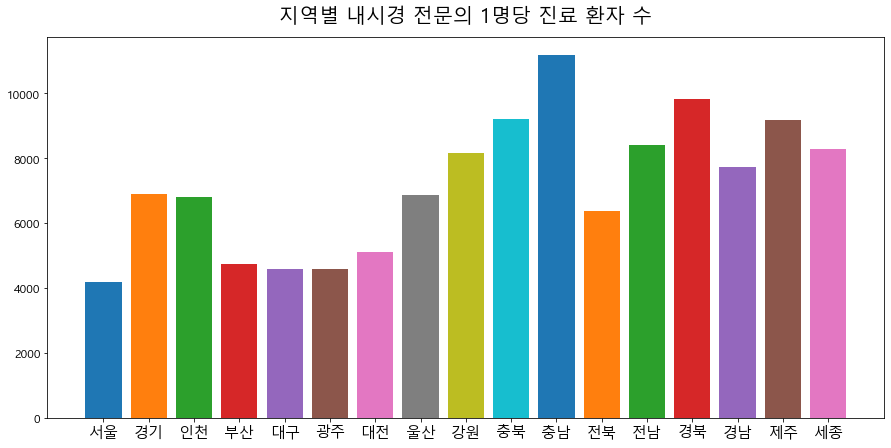

In [351]:
plt.figure(figsize = (15,7))
colors = sns.color_palette('tab10', len(df_merge.index))
plt.bar(df_merge.index, df_merge['내시경 전문의 1명당 진료 환자 수'], color = colors)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('지역별 내시경 전문의 1명당 진료 환자 수', fontsize = 20, pad = 15)
plt.show()